In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('/Users/calmpy/Desktop/2022 2학기 맥북/data_crawling/data/zigbang_seoul_cafe.csv', header=0, engine='python')


In [3]:
print('데이터셋 크기 : ', data_df.shape)

data_df.head()

데이터셋 크기 :  (1837, 14)


,Unnamed: 0,매물이름,보증금액,월세금액,관리금액,권리금,시,구,동,층,면적,인테리어,설명,엘레베이터
0,0,"신양초교 사거리 유명커피,프렌차이즈 20평 점포",2000,230,10,20000,서울특별시,광진구,자양동,1층,66.08,없음,◈ 신양초교사거리 프렌차이즈 20p 상가(양수도)입니다.\n 매출 좋고 위...,없음
1,1,"역세권 상권, 유동인구 많은 삼전동 카페",1000,60,3,1500,서울특별시,송파구,삼전동,1층,23.14,없음,주변에 비해 월세 관리비가 저렴한 매장입니다. 삼전 역에서 도보로 3분 거리에 위치...,없음
2,2,"대로변 1층, 주목도 높은 능동 카페 상가",5000,175,0,10000,서울특별시,광진구,능동,1층,19.83,없음,매장이 아담해서 인건비 없이 혼자 운영하시는 분에게 추천드리는 점포입니다. 버스정류...,없음
3,3,모던 인테리어 완비된 자양동 카페 상가 점포,1000,90,5,2000,서울특별시,광진구,자양동,3층,66.12,없음,내부 인테리어가 잘 갖추어져 있어서 동종 업종을 하시는 경우 초창기 시간과 비용을 ...,없음
4,4,"자양동 역세권 및 학세권, 유동인구 많은 카페",1000,75,0,2800,서울특별시,광진구,자양동,1층,33.06,없음,1층에 위치해 있어서 멀리서도 눈에 잘 띄어서 홍보 효과가 좋습니다. 주거지역에 위...,없음


In [4]:
data_df = data_df.drop(['매물이름','보증금액','월세금액','관리금액','권리금','시','구','동','층','면적','인테리어','엘레베이터'], axis=1, inplace=False)
data_df.head()

,Unnamed: 0,설명
0,0,◈ 신양초교사거리 프렌차이즈 20p 상가(양수도)입니다.\n 매출 좋고 위...
1,1,주변에 비해 월세 관리비가 저렴한 매장입니다. 삼전 역에서 도보로 3분 거리에 위치...
2,2,매장이 아담해서 인건비 없이 혼자 운영하시는 분에게 추천드리는 점포입니다. 버스정류...
3,3,내부 인테리어가 잘 갖추어져 있어서 동종 업종을 하시는 경우 초창기 시간과 비용을 ...
4,4,1층에 위치해 있어서 멀리서도 눈에 잘 띄어서 홍보 효과가 좋습니다. 주거지역에 위...


In [5]:
import re
data_df['설명']= data_df['설명'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+'," ",x))
data_df.head()

,Unnamed: 0,설명
0,0,신양초교사거리 프렌차이즈 상가 양수도 입니다 매출 좋고 위치 좋은...
1,1,주변에 비해 월세 관리비가 저렴한 매장입니다 삼전 역에서 도보로 분 거리에 위치...
2,2,매장이 아담해서 인건비 없이 혼자 운영하시는 분에게 추천드리는 점포입니다 버스정류...
3,3,내부 인테리어가 잘 갖추어져 있어서 동종 업종을 하시는 경우 초창기 시간과 비용을 ...
4,4,층에 위치해 있어서 멀리서도 눈에 잘 띄어서 홍보 효과가 좋습니다 주거지역에 위...


In [6]:
설명 = data_df['설명']

In [7]:
from konlpy.tag import Okt

okt=Okt()
설명_noun_tk = []

for d in 설명:
    설명_noun_tk.append(okt.nouns(d))

In [8]:
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

In [9]:
설명_noun_tk_join = []

for d in 설명_noun_tk:
    d2 = [w for w in d if len(w) >1] #길이가 1보다 큰 것만 추출 
    설명_noun_tk_join.append(" ".join(d2)) #토근을 연결(join)하여 리스트 구성

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [11]:
설명_tfidf=TfidfVectorizer(tokenizer = okt_tokenizer, min_df = 2)
설명_dtm = 설명_tfidf.fit_transform(설명_noun_tk_join)

In [12]:
설명_vocab = dict()

for idx, word in enumerate(설명_tfidf.get_feature_names()):
    설명_vocab[word] = 설명_dtm.getcol(idx).sum()
    
설명_words = sorted(설명_vocab.items(), key=lambda x: x[1], reverse=True)

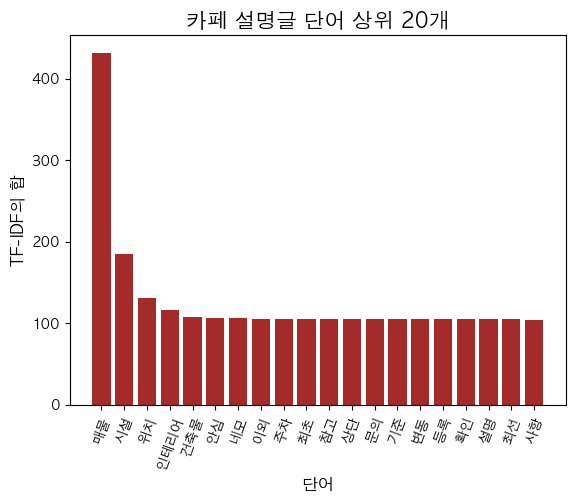

In [13]:
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
# font_name = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/AppleMyungjo.ttf").get_name()

max = 20
plt.bar(range(max), [i[1] for i in 설명_words[:max]], color="brown")
plt.title("카페 설명글 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in 설명_words[:max]], rotation=70)

plt.show()

### 